In [73]:
import Bio
from Bio import SeqIO
import collections
import numpy as np

dict = {}
i = 0
for record in SeqIO.parse("B2_rde4_small_cut.fastq", "fastq"):
    i += 1
    if i == 1000000 :
        break
    key = len(record)
    c = collections.Counter(record.seq)
    if key in dict : 
        dict[key]['count'] += 1
        dict[key]['data'] = np.vstack([dict[key]['data'],[c['A'] / key,c['C'] / key,c['G'] / key,c['T']/key]])
      
    else:

        dict[key] = {}
        dict[key]['count'] = 1
        dict[key]['data'] = np.array([c['A']/key,c['C']/key,c['G']/key,c['T']/key])
        dict[key]['mean'] = [0,0,0,0]
        dict[key]['median'] = [0,0,0,0]
        
for key, value in dict.items():
    if dict[key]['count'] > 1 :
        dict[key]['mean'] = np.mean(dict[key]['data'], axis=0)
        dict[key]['median'] = np.median(dict[key]['data'], axis=0)
    else:
        dict[key]['mean'] = dict[key]['data']
        dict[key]['median'] = dict[key]['data']

import pandas as pd

mean_percent_seq = np.array([dict[key]['mean'] * 100 for key, value in dict.items()])
median_percent_seq = np.array([dict[key]['median'] * 100 for key, value in dict.items()])
count_all_seq = np.array([dict[key]['count'] for key, value in dict.items()])
len_seq = [key for key, value in dict.items()]
df1 = pd.DataFrame(mean_percent_seq,columns=['A', 'C', 'G','T'],index = len_seq)
df1['count'] = count_all_seq
df1['index'] = len_seq

df2 = pd.DataFrame(median_percent_seq,columns=['A', 'C', 'G','T'],index = len_seq)
df2['count'] = count_all_seq
df2['index'] = len_seq

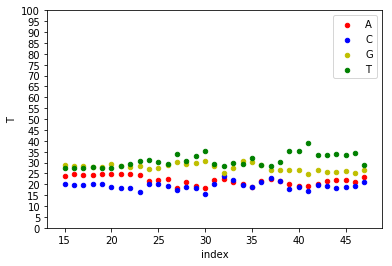

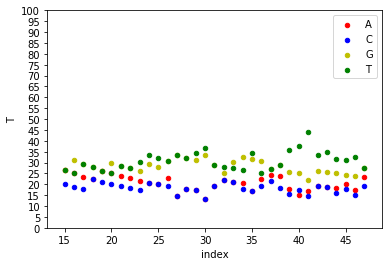

In [74]:
plt.clf()
plt.figure()
# plt.xlabel('Length')
# plt.xlabel('Percent')

ax1 = df1.plot(kind='scatter',x='index', y='A',c='r',label='A')
df1.plot(kind='scatter',x='index', y='C',label='C',c='b',ax=ax1)
df1.plot(kind='scatter',x='index', y='G',label='G',c='y',ax=ax1)
df1.plot(kind='scatter',x='index', y='T',label='T',c='g',ax=ax1)
#plt.xticks(np.arange(15, 23, step=1))
plt.yticks(np.arange(0, 101, step=5))
plt.show()

ax2 = df2.plot(kind='scatter',x='index', y='A',c='r',label='A')
df2.plot(kind='scatter',x='index', y='C',label='C',c='b',ax=ax2)
df2.plot(kind='scatter',x='index', y='G',label='G',c='y',ax=ax2)
df2.plot(kind='scatter',x='index', y='T',label='T',c='g',ax=ax2)
plt.yticks(np.arange(0, 101, step=5))
plt.show()

